In [1]:
from detectron2.config import LazyConfig, instantiate
from detectron2.engine import default_setup
from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog

cfg = LazyConfig.load("/data/ephemeral/home/level2-objectdetection-cv-01/detectron2/projects/ViTDet/configs/COCO/cascade_mask_rcnn_vitdet_b_100ep.py")
default_setup(cfg, "")

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[10/24 15:08:22 detectron2]: Rank of current process: 0. World size: 1
[10/24 15:08:23 detectron2]: Environment info:
-------------------------------  ----------------------------------------------------------------------------
sys.platform                     linux
Python                           3.10.13 (main, Sep 11 2023, 13:44:35) [GCC 11.2.0]
numpy                            1.22.4
detectron2                       0.6 @/data/ephemeral/home/level2-objectdetection-cv-01/detectron2/detectron2
Compiler                         GCC 9.4
CUDA compiler                    not available
DETECTRON2_ENV_MODULE            <not set>
PyTorch                          1.12.1+cu116 @/opt/conda/lib/python3.10/site-packages/torch
PyTorch debug build              False
torch._C._GLIBCXX_USE_CXX11_ABI  False
GPU available                    Yes
GPU 0                            Tesla V100-SXM2-32GB (arch=7.0)
Driver version                   535.161.08
CUDA_HOME                        None - invalid!
Pi

In [2]:
from tqdm import tqdm

In [3]:
import torch

In [4]:
from detectron2.modeling.proposal_generator.proposal_utils import add_ground_truth_to_proposals
from detectron2.structures import  pairwise_iou
from detectron2.structures import Boxes
import torch

In [5]:
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.engine.defaults import create_ddp_model

In [6]:
try:
    register_coco_instances('coco_trash_train', {}, '/data/ephemeral/home/dataset/train_80.json', '/data/ephemeral/home/dataset')
except AssertionError:
    pass
try:
    register_coco_instances('coco_trash_test', {}, '/data/ephemeral/home/dataset/val_20.json', '/data/ephemeral/home/dataset')
except AssertionError:
    pass

MetadataCatalog.get('coco_trash_train').thing_classes = ["General trash", "Paper", "Paper pack", "Metal", 
                                                        "Glass", "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

In [7]:
# cfg.train.init_checkpoint = "/data/ephemeral/home/level2-objectdetection-cv-01/detectron2/tools/output/model_final.pth"
cfg.train.init_checkpoint = "/data/ephemeral/home/level2-objectdetection-cv-01/detectron2/tools/output/vitdet /model_final.pth"

In [8]:
model = instantiate(cfg.model)
model.to(cfg.train.device)
train_loader = instantiate(cfg.dataloader.train)

/opt/conda/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


[10/24 15:08:28 d2.data.datasets.coco]: Loaded 3914 images in COCO format from /data/ephemeral/home/dataset/train_80.json
[10/24 15:08:28 d2.data.build]: Removed 0 images with no usable annotations. 3914 images left.
[10/24 15:08:28 d2.data.build]: Distribution of instances among all 10 categories:
|   category    | #instances   |  category   | #instances   |  category  | #instances   |
|:-------------:|:-------------|:-----------:|:-------------|:----------:|:-------------|
| General trash | 3161         |    Paper    | 5115         | Paper pack | 706          |
|     Metal     | 769          |    Glass    | 835          |  Plastic   | 2350         |
|   Styrofoam   | 1026         | Plastic bag | 4151         |  Battery   | 143          |
|   Clothing    | 377          |             |              |            |              |
|     total     | 18633        |             |              |            |              |
[10/24 15:08:28 d2.data.dataset_mapper]: [DatasetMapper] Augmentations

In [9]:
model = create_ddp_model(model)
DetectionCheckpointer(model).load(cfg.train.init_checkpoint)

[10/24 15:08:28 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /data/ephemeral/home/level2-objectdetection-cv-01/detectron2/tools/output/vitdet /model_final.pth ...
[10/24 15:08:28 fvcore.common.checkpoint]: [Checkpointer] Loading from /data/ephemeral/home/level2-objectdetection-cv-01/detectron2/tools/output/vitdet /model_final.pth ...


{'trainer': {'iteration': 92186,
  'hooks': {'LRScheduler': {'base_lrs': [0.0001,
     9.688901040699993e-07,
     9.688901040699993e-07,
     1.384128720099999e-06,
     1.384128720099999e-06,
     1.977326742999999e-06,
     1.977326742999999e-06,
     2.8247524899999986e-06,
     2.8247524899999986e-06,
     4.035360699999998e-06,
     4.035360699999998e-06,
     5.764800999999997e-06,
     5.764800999999997e-06,
     8.235429999999996e-06,
     8.235429999999996e-06,
     1.1764899999999996e-05,
     1.1764899999999996e-05,
     1.6806999999999993e-05,
     1.6806999999999993e-05,
     2.4009999999999995e-05,
     2.4009999999999995e-05,
     3.4299999999999993e-05,
     3.4299999999999993e-05,
     4.9e-05,
     4.9e-05,
     7e-05,
     7e-05],
    'last_epoch': 92187}},
  'optimizer': {'state': {0: {'step': tensor(92148.),
     'exp_avg': tensor([[[[ 2.9786e-06, -4.0774e-05],
               [-5.5716e-06, -2.0263e-05]],
     
              [[ 2.2067e-06, -1.1792e-06],
           

In [10]:
# for batch in train_loader:
#     break

In [11]:
cfg.dataloader.train

{'dataset': {'names': 'coco_trash_train', '_target_': <function get_detection_dataset_dicts at 0x7fb305f4fb50>}, 'mapper': {'is_train': True, 'augmentations': [{'horizontal': True, '_target_': <class 'detectron2.data.transforms.augmentation_impl.RandomFlip'>}, {'min_scale': 0.1, 'max_scale': 2.0, 'target_height': 1024, 'target_width': 1024, '_target_': <class 'detectron2.data.transforms.augmentation_impl.ResizeScale'>}, {'crop_size': [1024, 1024], 'pad': False, '_target_': <class 'detectron2.data.transforms.augmentation_impl.FixedSizeCrop'>}], '_target_': <class 'detectron2.data.dataset_mapper.DatasetMapper'>, 'image_format': 'RGB'}, 'total_batch_size': 3, 'num_workers': 4, '_target_': <function build_detection_train_loader at 0x7fb305f4ff40>}

In [12]:
int(train_loader.dataset.dataset.sampler._size/3)

1304

In [13]:
box_feature_list = torch.zeros(0).cuda()
box_label_list = torch.zeros(0).cuda()

idx = 0 
target_size = int(train_loader.dataset.dataset.sampler._size/3)

for batch in tqdm(train_loader):

    idx+=1
    if idx>target_size:
        break

    with torch.no_grad():
        image = model.preprocess_image(batch)
        test = model.backbone(image.tensor)

        gt_instances = [x["instances"].to(model.device) for x in batch]
        # features = [test[f] for f in model.proposal_generator.in_features]
        features = [test[f] for f in model.roi_heads.box_in_features]
        box_features = model.roi_heads.box_pooler(features, [x.gt_boxes for x in gt_instances])
        box_feature_list = torch.cat([box_feature_list,box_features],dim=0)
        box_label = torch.cat([x.gt_classes for x in gt_instances])
        box_label_list = torch.cat([box_label_list,box_label],dim=0)
        

1304it [08:50,  2.46it/s]


In [14]:
box_label_list.shape

torch.Size([17185])

In [15]:
box_feature_list.shape

torch.Size([17185, 256, 7, 7])

In [16]:
mean_feats = box_feature_list.mean(dim=[2,3])

In [17]:
mean_feats.shape

torch.Size([17185, 256])

In [18]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [19]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(mean_feats.cpu().numpy())

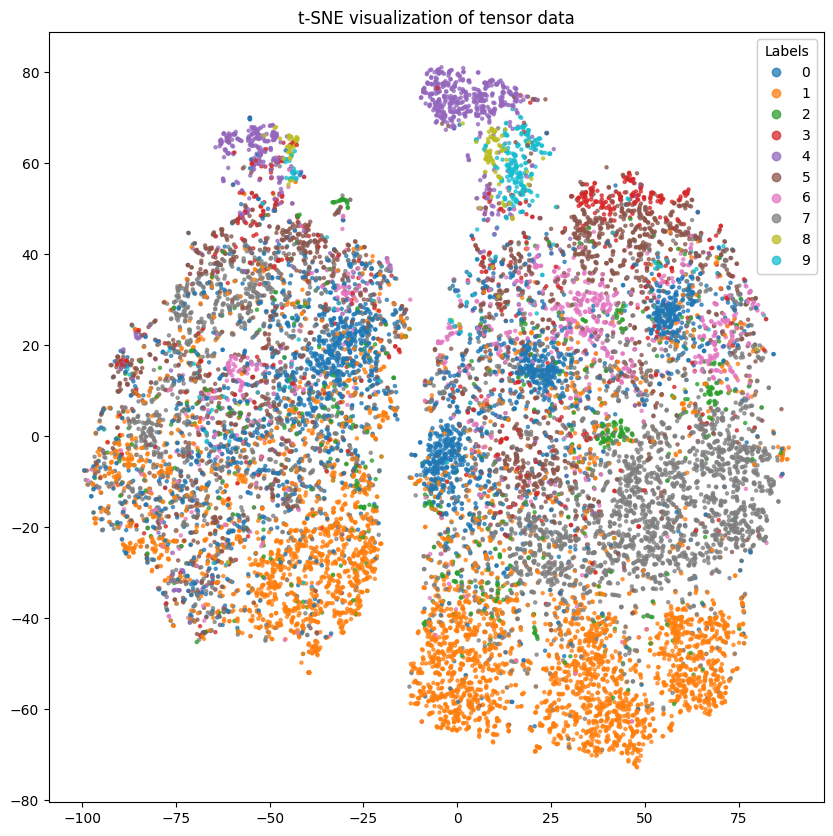

In [20]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=box_label_list.cpu().numpy(), s=5, cmap='tab10', alpha=0.7)
plt.title('t-SNE visualization of tensor data')

legend = plt.legend(*scatter.legend_elements(), title="Labels")
plt.gca().add_artist(legend)

plt.show()